# SIC - EDA & Visualization

### Context

The key to success in any organization is attracting and retaining top talent. I’m an HR analyst at my company, and one of my tasks is to determine which factors keep employees at my company and which prompt others to leave. I need to know what factors I can change to prevent the loss of good people. Watson Analytics is going to help.

### Imports & configs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
fig = plt.figure(figsize=[15,15])

<Figure size 1080x1080 with 0 Axes>

### Read Data

In [3]:
df = pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Dataset info

In [4]:
print(f"Rows: {df.shape[0]}")
print(f"columns: {df.shape[1]}")

Rows: 1470
columns: 35


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

So we have 26 numerical features and 9 categorical features 

# EDA

#### Samples of data

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [8]:
df.describe(include = "int64")

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.describe(include = "object")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [10]:
print(f"missing values: {df.isnull().sum().sum()}")

missing values: 0


**Description about the data**
```
Education:                  1 'Below College'   2 'College' 3 'Bachelor'    4 'Master'      5 'Doctor'

EnvironmentSatisfaction:    1 'Low'             2 'Medium'  3 'High'        4 'Very High'

JobInvolvement:             1 'Low'             2 'Medium'  3 'High'        4 'Very High'

JobSatisfaction:            1 'Low'             2 'Medium'  3 'High'        4 'Very High'

PerformanceRating:          1 'Low'             2 'Good'    3 'Excellent'   4 'Outstanding'

RelationshipSatisfaction:   1 'Low'             2 'Medium'  3 'High'        4 'Very High'

WorkLifeBalance:            1 'Bad'             2 'Good'    3 'Better'      4 'Best'
```

**Target**: Attrition

In [11]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [12]:
fig = px.pie(df, names = 'Attrition', title = 'Target Variable: Attrition', template = 'plotly_dark')
fig.update_traces(rotation=90, pull = [0.1], textinfo = "percent+label")
fig.show()

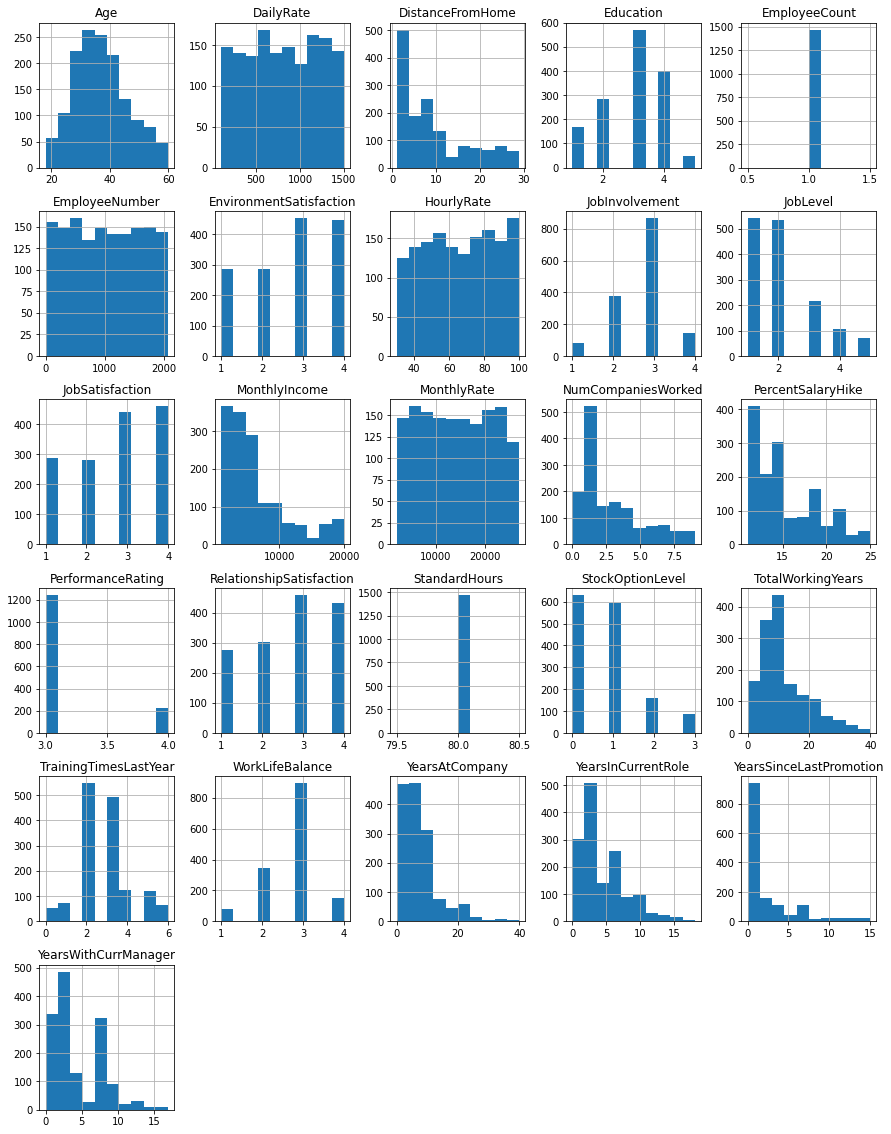

In [13]:
df.hist(bins = 10 , figsize = (15,20))
plt.show()

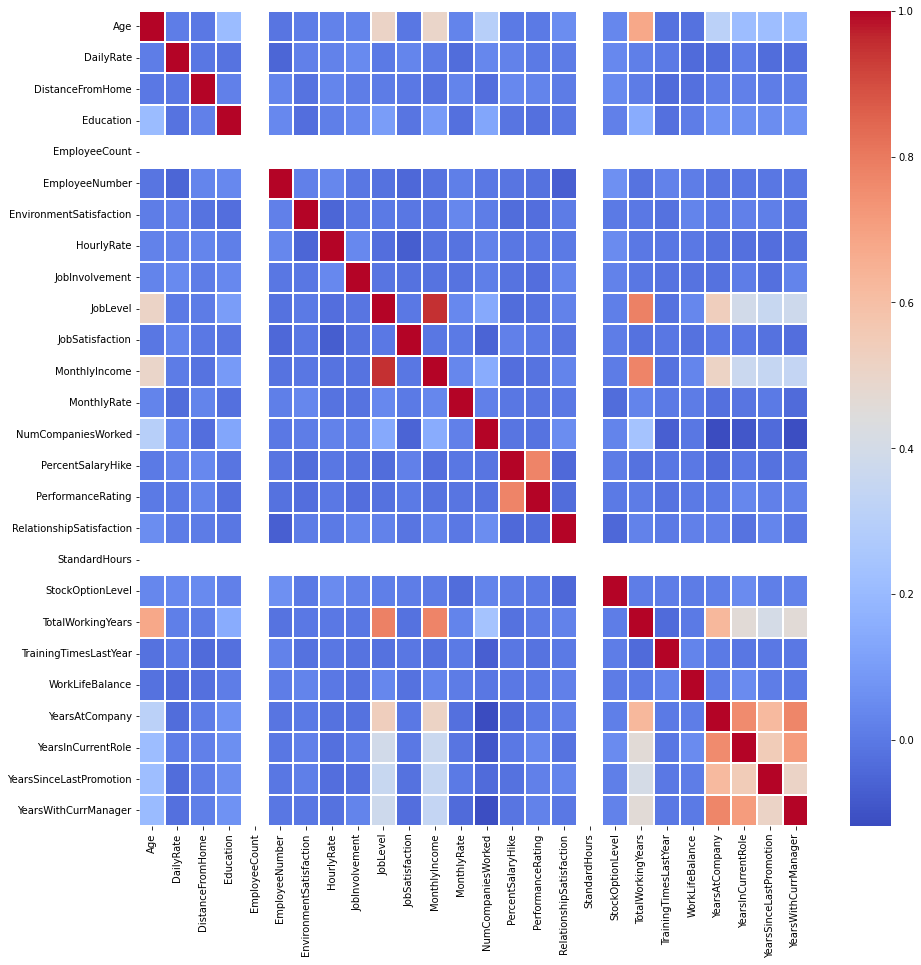

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), linewidth=0.1, cmap='coolwarm')
plt.show()

- TotalWorkingYears is positively correlated with JobLevel, and MonthlyIncome.
- little bit of positive correlation can be seen between YearsAtCompany with YearsInCurrentRole, and YearsWithCurrentManager.

In [15]:
categorical_features = df.select_dtypes(include=[object]).columns
df[categorical_features].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [16]:
for feature in categorical_features[1:]:
    print('-'*30)
    print(f"{feature}:")
    print(df[feature].value_counts())

    fig = px.histogram(df, x = df[feature], template = 'plotly_dark',
                      title = f'Attrition x {feature}', text_auto = 'd3-format', color='Attrition')
    fig.show()

    # plt.figure(figsize=(8,5))
    # sns.countplot(x=feature, hue='Attrition', data=df, palette='plasma')
    # plt.xticks(rotation=45)
    # plt.title(f"Attrition - {feature}")
    # plt.show()

------------------------------
BusinessTravel:
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


------------------------------
Department:
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


------------------------------
EducationField:
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


------------------------------
Gender:
Male      882
Female    588
Name: Gender, dtype: int64


------------------------------
JobRole:
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


------------------------------
MaritalStatus:
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


------------------------------
Over18:
Y    1470
Name: Over18, dtype: int64


------------------------------
OverTime:
No     1054
Yes     416
Name: OverTime, dtype: int64


**OBSERVATIONS**

- The number of Attrition of employees who travel very rare are more.
- Employees working in R&D department are more, but employees from sales department or at position like sales executive, sale Representative leaves the job early.
- Males are more under Attrition then Females
- Male workers are more who do overtime.

In [17]:
numerical_features = df.select_dtypes(include=['int64']).columns
df[numerical_features].head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [18]:
for feature in numerical_features:
    print('-'*30)
    print(f"{feature}:")
    print(f"Number of unique values for {feature}: {df[feature].nunique()}")
    fig = px.histogram(df, x = df[feature], nbins  = 20, template = 'plotly_dark',
                      title = f'Attrition x {feature}', color="Attrition")
    fig.show()

------------------------------
Age:
Number of unique values for Age: 43


------------------------------
DailyRate:
Number of unique values for DailyRate: 886


------------------------------
DistanceFromHome:
Number of unique values for DistanceFromHome: 29


------------------------------
Education:
Number of unique values for Education: 5


------------------------------
EmployeeCount:
Number of unique values for EmployeeCount: 1


------------------------------
EmployeeNumber:
Number of unique values for EmployeeNumber: 1470


------------------------------
EnvironmentSatisfaction:
Number of unique values for EnvironmentSatisfaction: 4


------------------------------
HourlyRate:
Number of unique values for HourlyRate: 71


------------------------------
JobInvolvement:
Number of unique values for JobInvolvement: 4


------------------------------
JobLevel:
Number of unique values for JobLevel: 5


------------------------------
JobSatisfaction:
Number of unique values for JobSatisfaction: 4


------------------------------
MonthlyIncome:
Number of unique values for MonthlyIncome: 1349


------------------------------
MonthlyRate:
Number of unique values for MonthlyRate: 1427


------------------------------
NumCompaniesWorked:
Number of unique values for NumCompaniesWorked: 10


------------------------------
PercentSalaryHike:
Number of unique values for PercentSalaryHike: 15


------------------------------
PerformanceRating:
Number of unique values for PerformanceRating: 2


------------------------------
RelationshipSatisfaction:
Number of unique values for RelationshipSatisfaction: 4


------------------------------
StandardHours:
Number of unique values for StandardHours: 1


------------------------------
StockOptionLevel:
Number of unique values for StockOptionLevel: 4


------------------------------
TotalWorkingYears:
Number of unique values for TotalWorkingYears: 40


------------------------------
TrainingTimesLastYear:
Number of unique values for TrainingTimesLastYear: 7


------------------------------
WorkLifeBalance:
Number of unique values for WorkLifeBalance: 4


------------------------------
YearsAtCompany:
Number of unique values for YearsAtCompany: 37


------------------------------
YearsInCurrentRole:
Number of unique values for YearsInCurrentRole: 19


------------------------------
YearsSinceLastPromotion:
Number of unique values for YearsSinceLastPromotion: 16


------------------------------
YearsWithCurrManager:
Number of unique values for YearsWithCurrManager: 18


In [19]:
ordinal_features = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction',
                    'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
df[ordinal_features].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,3,4,3,1,1
1,1,3,2,2,4,4,3
2,2,4,2,3,3,2,3
3,4,4,3,3,3,3,3
4,1,1,3,2,3,4,3


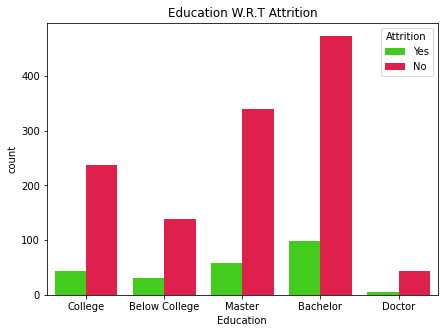

In [20]:
edu_map = {1 :'Below College', 2: 'College', 3 :'Bachelor', 4 :'Master', 5: 'Doctor'}
plt.figure(figsize=(7,5))
sns.countplot(x=df['Education'].map(edu_map), hue='Attrition', data=df, palette='prism')
plt.title("Education W.R.T Attrition")
plt.show()

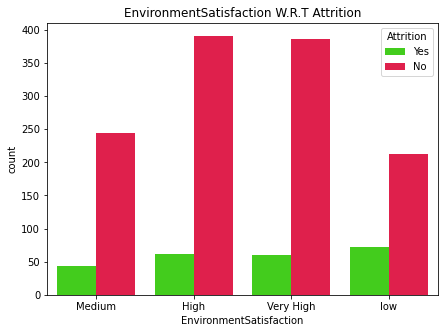

In [21]:
env_map = {1 :'low', 2: 'Medium', 3 :'High', 4 :'Very High'}
plt.figure(figsize=(7,5))
sns.countplot(x=df['EnvironmentSatisfaction'].map(env_map), hue='Attrition', data=df, palette='prism')
plt.title("EnvironmentSatisfaction W.R.T Attrition")
plt.show()

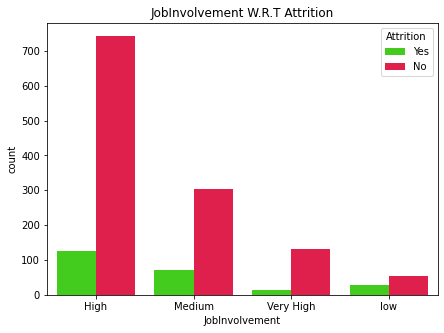

In [22]:
job_map = {1 :'low', 2: 'Medium', 3 :'High', 4 :'Very High'}
plt.figure(figsize=(7,5))
sns.countplot(x=df['JobInvolvement'].map(job_map), hue='Attrition', data=df, palette='prism')
plt.title("JobInvolvement W.R.T Attrition")
plt.show()

**OBSERVATIONS**

- Employees from Bachelor are more, than from Masters background.
- EnvironmentSatisfaction can be rank as high or medium. means very less employees do not like the work environment which cannot be seem as great cause for changing a job.
- JobInvolvement of employees is very much high.